In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
def image_stats(image):
  #compute the mean and standard deviation of each channel
  l, a, b = cv2.split(image)
  lMean, lStd = l.mean(), l.std()
  aMean, aStd = a.mean(), a.std()
  bMean, bStd = b.mean(), b.std()

  return lMean, lStd, aMean, aStd, bMean, bStd

def color_transfer(source, target):
  #convert the images from the RGB to L*a*b color space, being sure to utilizing
  # the floating point data type (note: OpenCV expects floats to be 32-bit, so
  # use that instead of 64-bit)
  source = cv2.cvtColor(source, cv2.COLOR_BGR2LAB).astype(np.float32)
  target = cv2.cvtColor(target, cv2.COLOR_BGR2LAB).astype(np.float32)

  # compute color statistics for the source and target images
  (lMeanSrc, lStdSrc, aMeanSrc, aStdSrc, bMeanSrc, bStdSrc) = image_stats(source)
  (lMeanTar, lStdTar, aMeanTar, aStdTar, bMeanTar, bStdTar) = image_stats(target)

  # subtract the mean from the target image
  l,a,b = cv2.split(target)
  l -= lMeanTar
  a -= aMeanTar
  b -= bMeanTar

  # scale the target channels by the ratio of the standard deviation of the
  # target divided by the standard deviation of the source, multipled by the 
  # target channels
  l = (lStdTar / lStdSrc) * l
  a = (aStdTar / aStdSrc) * a
  b = (bStdTar / bStdSrc) * b

  # add in the source mean
  l += lMeanSrc
  a += aMeanSrc
  b += bMeanSrc

  # clip the pixel intensities to [0, 255] if they fall outside this range
  l = np.clip(l, 0, 255)
  a = np.clip(a, 0, 255)
  b = np.clip(b, 0, 255)

  # merge the channel together and convert back to the RGB color space
  # , being sure to utilize the 8-bit unsigned integer data type
  tranfer = cv2.merge([l, a, b]).astype(np.uint8)
  tranfer = cv2.cvtColor(tranfer, cv2.COLOR_LAB2BGR)

  return tranfer



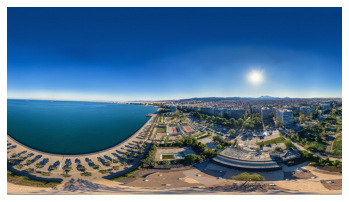

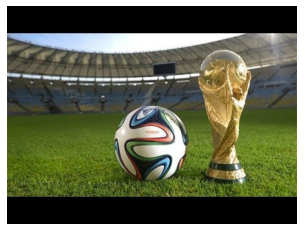

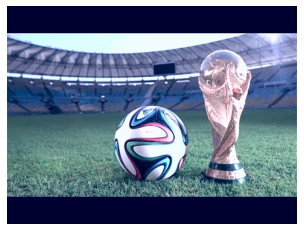

In [8]:
def show(image):
  plt.axis("off")
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()


target = cv2.imread("/content/drive/MyDrive/colab_img/hqdefault.jpg")
source = cv2.imread("/content/drive/MyDrive/colab_img/R.jfif")
tranfer = color_transfer(source, target)
show(source)
show(target)
show(tranfer)